# Streategy Selection/Allocation

In [55]:
# loading in libraries 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn import preprocessing

In [ ]:
# loading in stock data 

raw = pd.read_csv('Trading_Project_Data.csv', index_col = 0, parse_dates = True, header = [0,1])

names_full = ['AAPL','AMZN', 'BA', 'CAT', 'CVX', 'GOOGL', 'GS', 'JNJ', 'JPM', 'KO','MCD', 'MSFT','NKE','NVDA','PFE','SOFI', 'TSLA', 'UNH', 'WMT','XOM']

names = ['AMZN','CAT','CVX','JPM','MSFT','NKE','NVDA','SOFI','WMT','XOM']



/var/folders/ww/t2gpxbpj1dxghvgyxhxsyczm0000gn/T/ipykernel_47288/793958378.py:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  raw = pd.read_csv('Trading_Project_Data.csv', index_col = 0, parse_dates = True, header = [0,1])


In [66]:
stock_eod = pd.DataFrame(raw['Close']) # Gathering Closing Price data 

cols = stock_eod[names]
log_cols = []

for col in cols:
    stock_eod[f'log_ret_{col}'] = np.log(stock_eod[col]) - np.log(stock_eod[col].shift(1))
    log_cols.append(f'log_ret_{col}')


stock_eod = stock_eod.dropna()

In [67]:
# Computing Annulised Mean and Stdev 
an_mean = np.array(stock_eod[log_cols].mean() * 252)
an_sigma = np.array(stock_eod[log_cols].std() * np.sqrt(252))
an_mean 

array([ 0.36033798,  0.29226164,  0.15668554,  0.43140168,  0.07707258,
       -0.33483306,  0.81935355,  0.73341536,  0.54330093,  0.17588978])

In [68]:
an_vol = pd.DataFrame(an_sigma, columns = ['annulised vol'], index = [names])
an_mean = pd.DataFrame(an_mean, columns = ['annulised mean'], index = [names])

In [69]:
an_mean_norm = preprocessing.StandardScaler().fit_transform(an_mean)
an_vol_norm = preprocessing.StandardScaler().fit_transform(an_vol)

In [70]:
X = []
for i in range(0,len(an_mean_norm)):
    X.append([float(an_mean_norm[i]),float(an_vol_norm[i])])

/var/folders/ww/t2gpxbpj1dxghvgyxhxsyczm0000gn/T/ipykernel_47288/241303270.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X.append([float(an_mean_norm[i]),float(an_vol_norm[i])])


In [71]:
model = KMeans(n_clusters = 4)

model.fit(X)

y_kmeans = model.predict(X)

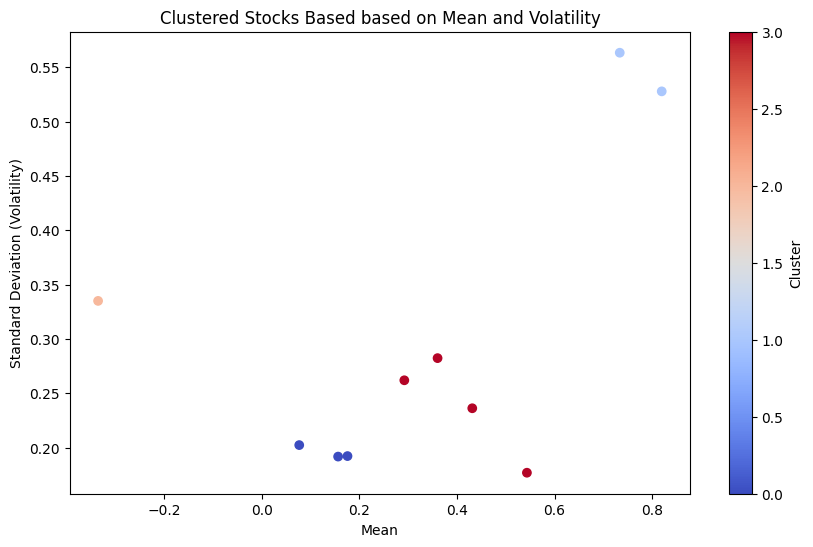

In [85]:
plt.figure(figsize=(10, 6))
plt.scatter(an_mean, an_vol, c=y_kmeans, cmap='coolwarm')
plt.xlabel("Mean")
plt.ylabel("Standard Deviation (Volatility)")
plt.title("Clustered Stocks Based based on Mean and Volatility")
plt.colorbar(label="Cluster")
plt.show()



['AMZN', 'CAT', 'CVX', 'JPM', 'MSFT', 'NKE', 'NVDA', 'SOFI', 'WMT', 'XOM']